# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Al Jauzi Abdurrohman
- **Email:** aljauzir@gmail.com
- **ID Dicoding:** aljauzr

## Menentukan Pertanyaan Bisnis

- Kapan waktu paling optimal untuk menyediakan lebih banyak sepeda untuk direntalkan?
- Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda (baik kasual maupun terdaftar)?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Data Wrangling
import numpy as np
import pandas as pd

# Exploratory Data Analysis (EDA), Data Visualization, & Explanatory Analysis
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Memuat tabel harian (day.csv)

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/aljauzr/pad-submission-dicoding/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel jam (hour.csv)

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/aljauzr/pad-submission-dicoding/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset terlebih dulu diunggah ke repository publik github pribadi lalu dibaca menggunakan fungsi read_csv dari library pandas
- Kedua tabel kemudian ditampilkan menggunakan fungsi head() untuk melihat 5 baris pertama yang akan memberikan gambaran untuk dianalisis lebih dalam

### Assessing Data

Menilai data harian (hour.csv)

In [4]:
# Periksa tipe dan jumlah data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Periksa apakah terdapat missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
# Periksa apakah terdapat data duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Periksa ringkasan parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai data jam (hour.csv)

In [8]:
# Periksa tipe dan jumlah data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Periksa apakah terdapat missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
# Periksa apakah terdapat data duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Periksa ringkasan parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari proses assessing data pada data day.csv dan hour.csv tidak ditemukan missing value, dan duplikat. Oleh karena itu, tidak diperlukan proses yang menangani masalah tersebut.
- Ringkasan parameter statistik dari kedua data sudah menunjukkan nilai yang sesuai dengan deskripsi dataset pada file Readme.txt.
- Terdapat kolom yang tidak berpengaruh untuk proses analisis data lanjutan, yaitu kolom 'instant', maka pada proses cleaning data kolom ini akan dihapus.
- Kolom 'holiday' sebenarnya sudah direpresentasikan oleh kolom 'workingday' yang menjelaskan apakah hari itu libur atau tidak (jika libur bernilai 1 dan 0 jika tidak), maka kolom 'holiday' juga akan dihapus.
- Pada kolom 'dteday' di kedua data, tipe datanya masih berupa object, tipe data ini selanjutnya akan diubah ke tipe data datetime agar lebih sesuai.

### Cleaning Data

In [12]:
# Menghapus kolom 'instant' dan 'holiday' lalu mengubah tipe data kolom 'dteday' dari object menjadi datetime pada data day.csv
day_df.drop(columns=['instant'], inplace=True)
day_df.drop(columns=['holiday'], inplace=True)
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   weekday     731 non-null    int64         
 5   workingday  731 non-null    int64         
 6   weathersit  731 non-null    int64         
 7   temp        731 non-null    float64       
 8   atemp       731 non-null    float64       
 9   hum         731 non-null    float64       
 10  windspeed   731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB


In [13]:
# Menghapus kolom 'instant' dan 'holiday' lalu mengubah tipe data kolom 'dteday' dari object menjadi datetime pada data hour.csv
hour_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['holiday'], inplace=True)
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   weekday     17379 non-null  int64         
 6   workingday  17379 non-null  int64         
 7   weathersit  17379 non-null  int64         
 8   temp        17379 non-null  float64       
 9   atemp       17379 non-null  float64       
 10  hum         17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 2.0 MB


**Insight:**
- Kolom seperti 'season', 'mnth', 'weekday', dan 'workingday' sebenarnya merupakan data kategori, bukan nominal. Pada proses EDA kolom ini nilainya akan diubah menjadi teks sesuai dokumentasi yang terdapat pada file Readme.txt agar lebih mudah dibaca ketika dilakukan visualisasi data.
- Data 'hour.csv' sebenarnya lebih merepresentasikan data secara keseluruhan dengan menunjukkan data setiap jam pada setiap harinya dari tahun 2011 hingga 2012. Maka dari itu data yang digunakan untuk menjawab pertanyaan bisnis hanya data 'hour.csv'

## Exploratory Data Analysis (EDA)

### Explore ...

**Explore Pertanyaan 1: Kapan waktu paling optimal untuk menyediakan lebih banyak sepeda untuk direntalkan?**

Mengubah nilai kolom 'season', 'yr', 'mnth', 'weekday', dan 'workingday' sesuai nilai yang didefinisikan di file Readme.txt

In [14]:
# Mengubah nilai kolom 'season' menjadi nilai kategori
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
hour_df['season'] = hour_df['season'].map(season_mapping)

# Mengubah nilai kolom 'yr' menjadi nilai tahun aslinya
yr_mapping = {
    0: 2011,
    1: 2012
}
hour_df['yr'] = hour_df['yr'].map(yr_mapping)

# Mengubah nilai kolom 'mnth' menjadi nilai kategori
mnth_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
hour_df['mnth'] = hour_df['mnth'].map(mnth_mapping)

# Mengubah nilai kolom 'weekday' menjadi nilai kategori
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

# Mengubah nilai kolom 'workingday' menjadi nilai kategori
workingday_mapping = {
    0: 'Not Holiday',
    1: 'Holiday'
}
hour_df['workingday'] = hour_df['workingday'].map(workingday_mapping)

print("Nilai kolom 'season': ", hour_df['season'].unique())
print("Nilai kolom 'yr': ", hour_df['yr'].unique())
print("Nilai kolom 'mnth': ", hour_df['mnth'].unique())
print("Nilai kolom 'weekday': ", hour_df['weekday'].unique())
print("Nilai kolom 'workingday': ", hour_df['workingday'].unique())

Nilai kolom 'season':  ['Spring' 'Summer' 'Fall' 'Winter']
Nilai kolom 'yr':  [2011 2012]
Nilai kolom 'mnth':  ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
Nilai kolom 'weekday':  ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Nilai kolom 'workingday':  ['Not Holiday' 'Holiday']


In [15]:
# Menampilkan data hour.csv setelah dilakukan perubahan nilai
hour_df.head()

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,0,Saturday,Not Holiday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,Saturday,Not Holiday,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,Saturday,Not Holiday,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,Saturday,Not Holiday,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,Saturday,Not Holiday,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
# Mengetahui pada musim apa rata-rata sepeda dirental oleh keseluruhan pelanggan
hour_df.groupby(by="season").agg({
    "cnt": ["mean"]
}).sort_values(by=("cnt", "mean"), ascending=False)

,cnt
,mean
season,
Fall,236.016237
Summer,208.344069
Winter,198.868856
Spring,111.114569


In [17]:
# Mengetahui pada bulan apa rata-rata sepeda dirental oleh keseluruhan pelanggan
hour_df.groupby(by="mnth").agg({
    "cnt": ["mean", "min", "max", "std"]
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt                     
                 mean min  max         std
mnth                                      
September  240.773138   1  977  214.609531
June       240.515278   1  900  196.038950
August     238.097627   1  941  200.444648
July       231.819892   1  913  187.483806
May        222.907258   1  873  187.721497
October    222.158511   1  963  203.477057
April      187.260960   1  822  181.137902
November   177.335421   1  729  158.973887
March      155.410726   1  957  163.543050
December   142.303439   1  759  141.080674
February   112.865026   1  610  112.486565
January     94.424773   1  559   99.907146

In [18]:
# Mengetahui pada jam berapa rata-rata sepeda dirental oleh keseluruhan pelanggan
hour_df.groupby(by="hr").agg({
    "cnt": ["mean", "min", "max", "std"]
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt                     
          mean min  max         std
hr                                 
17  461.452055  15  976  232.656611
18  425.510989  23  977  224.639304
8   359.011004   5  839  235.189285
16  311.983562  11  783  148.682618
19  311.523352  11  743  161.050359
13  253.661180  11  760  148.107657
12  253.315934   3  776  145.081134
15  251.233196   7  750  144.632541
14  240.949246  12  750  147.271574
20  226.030220  11  567  119.670164
9   219.309491  14  426   93.703458
7   212.064649   1  596  161.441936
11  208.143054  10  663  127.495536
10  173.668501   8  539  102.205413
21  172.314560   6  584   89.788893
22  131.335165   9  502   69.937782
23   87.831044   2  256   50.846889
6    76.044138   1  213   55.084348
0    53.898072   2  283   42.307910
1    33.375691   1  168   33.538727
2    22.869930   1  132   26.578642
5    19.889819   1   66   13.200765
3    11.727403   1   79   13.239190
4     6.352941   1   28    4.143818

In [19]:
# Mengetahui pada hari apa rata-rata sepeda dirental oleh keseluruhan pelanggan
hour_df.groupby(by="weekday").agg({
    "cnt": ["mean", "min", "max", "std"]
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt                     
                 mean min  max         std
weekday                                   
Thursday   196.436665   1  976  188.011923
Friday     196.135907   1  957  174.076894
Tuesday    191.238891   1  970  187.820480
Wednesday  191.130505   1  977  190.894464
Saturday   190.209793   1  783  179.820569
Monday     183.744655   1  968  179.514167
Sunday     177.468825   1  776  168.167710

In [20]:
# Mengetahui pada kondisi hari seperti apa (libur/tidak) rata-rata sepeda dirental oleh keseluruhan pelanggan
hour_df.groupby(by="workingday").agg({
    "cnt": ["mean", "min", "max", "std"]
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt                     
                   mean min  max         std
workingday                                  
Holiday      193.207754   1  977  185.107477
Not Holiday  181.405332   1  783  172.853832

**Insight:**
Berdasarkan proses yang dilakukan, maka dapat diketahui bahwa waktu paling optimal untuk menyediakan sepeda untuk dirental yaitu pada saat:
- Musim: Fall (Gugur)
- Bulan: September dan Juni
- Jam: 17.00
- Hari: Kamis dan Jumat
- Libur/Tidak: Libur

**Explore Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda (baik kasual maupun terdaftar)?**

Untuk mengetahui kondisi cuaca, kita perlu memperhatikan kolom apa saja yang merepresentasikan kondisi cuaca pada data tersebut. Pada deskripsi di dataset, kolom yang merepresentasikan kondisi cuaca adalah kolom weathersit, temp, atemp, hum, dan windspeed.
Pada weathersit, nilai 1-4 merepresentasikan kondisi cuaca seperti berikut:
- 1: Cerah dan sedikit berawan
- 2: Mendung dan berawan
- 3: Sedikit turun salju, sedikit hujan, badai, dan awan mendung
- 4: Hujan lebat, salju, badai, mendung, berkabut

In [128]:
# Mengetahui pada kondisi cuaca seperti apa rata-rata sepeda dirental oleh keseluruhan pelanggan
hour_df.groupby(by="weathersit").agg({
    "cnt": ["mean"]
}).sort_values(by=("cnt", "mean"), ascending=False)

,cnt
,mean
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


Sedangkan untuk kolom temp, atemp, hum, dan windspeed, deskripsinya adalah sebagai berikut:
- temp: nilai cuaca sebenarnya (dalam celcius) yang telah dinormalisasi menjadi nilai 0-1 dengan nilai maksimalnya adalah 41 derajat celcius
- atemp: nilai cuaca yang dirasakan oleh manusia (dalam celcius) yang telah dinormalisasi menjadi nilai 0-1 dengan nilai maksimalnya adalah 50 derajat celcius
- hum: nilai kelembapan yang telah dinormalisasi menjadi nilai 0-1 dengan nilai maksimalnya adalah 100
- windspeed: nilai kecepatan angin yang telah dinormalisasi menjadi nilai 0-1 dengan nilai maksimalnya adalah 100

Maka dari itu, untuk memahami data sebenarnya kita perlu melakukan perubahan nilai data yang telah dinormalisasi ke nilai sebenarnya pada kolom di atas.

In [53]:
# Mengubah nilai kondisi cuaca yang telah dinormalisasi ke nilai sebenarnya
hour_df['temp_actual'] = hour_df['temp'] * 41
hour_df['atemp_actual'] = hour_df['atemp'] * 50
hour_df['hum_actual'] = hour_df['hum'] * 100
hour_df['windspeed_actual'] = hour_df['windspeed'] * 67

hour_df.head()

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_actual,atemp_actual,hum_actual,windspeed_actual,temp_bin
0,2011-01-01,Spring,2011,January,0,Saturday,Not Holiday,1,0.24,0.2879,0.81,0.0,3,13,16,9.84,14.395,81.0,0.0,"(8, 10]"
1,2011-01-01,Spring,2011,January,1,Saturday,Not Holiday,1,0.22,0.2727,0.80,0.0,8,32,40,9.02,13.635,80.0,0.0,"(8, 10]"
2,2011-01-01,Spring,2011,January,2,Saturday,Not Holiday,1,0.22,0.2727,0.80,0.0,5,27,32,9.02,13.635,80.0,0.0,"(8, 10]"
3,2011-01-01,Spring,2011,January,3,Saturday,Not Holiday,1,0.24,0.2879,0.75,0.0,3,10,13,9.84,14.395,75.0,0.0,"(8, 10]"
4,2011-01-01,Spring,2011,January,4,Saturday,Not Holiday,1,0.24,0.2879,0.75,0.0,0,1,1,9.84,14.395,75.0,0.0,"(8, 10]"


In [55]:
# Mengetahui pada kondisi suhu sebenarnya seperti apa sepeda paling banyak dirental oleh keseluruhan pelanggan
hour_df.groupby(by="temp_actual").agg({
    "cnt": ["sum"]
}).sort_values(by=("cnt", "sum"), ascending=False)

,cnt
,sum
temp_actual,
28.70,177298
29.52,163449
30.34,161587
27.06,156204
26.24,154985
24.60,149905
25.42,148185
31.16,135660


In [54]:
# Mengetahui pada kondisi suhu yang dirasakan seperti apa sepeda paling banyak dirental oleh keseluruhan pelanggan
hour_df.groupby(by="atemp_actual").agg({
    "cnt": ["sum"]
}).sort_values(by=("cnt", "sum"), ascending=False)

,cnt
,sum
atemp_actual,
31.060,311459
32.575,162997
33.335,155734
30.305,129150
34.850,127608
...,...
47.725,115
1.515,111


In [56]:
# Mengetahui pada kondisi kelembapan seperti apa sepeda paling banyak dirental oleh keseluruhan pelanggan
hour_df.groupby(by="hum_actual").agg({
    "cnt": ["sum"]
}).sort_values(by=("cnt", "sum"), ascending=False)

,cnt
,sum
hum_actual,
83.0,93265
55.0,86206
46.0,79253
66.0,76920
62.0,76125
...,...
8.0,77
97.0,64


In [57]:
# Mengetahui pada kondisi kecepatan angin seperti apa sepeda paling banyak dirental oleh keseluruhan pelanggan
hour_df.groupby(by="windspeed_actual").agg({
    "cnt": ["sum"]
}).sort_values(by=("cnt", "sum"), ascending=False)

,cnt
,sum
windspeed_actual,
0.0000,350203
11.0014,332998
12.9980,332407
15.0013,320678
8.9981,306423
16.9979,276880
7.0015,268821
19.0012,225882


**Insight:**
Berdasarkan proses yang dilakukan, kondisi cuaca dengan kriteria berikut sangat berpengaruh bagi pelanggan untuk merental sepeda.
- Kondisi cuaca (weathersit): 1 (Cerah dan sedikit berawan)
- Temperatur: 28,70°C
- Temperatur (yang dirasakan): 31,06°C
- Kecepatan angin: 0

## Visualization & Explanatory Analysis

### Pertanyaan 1:

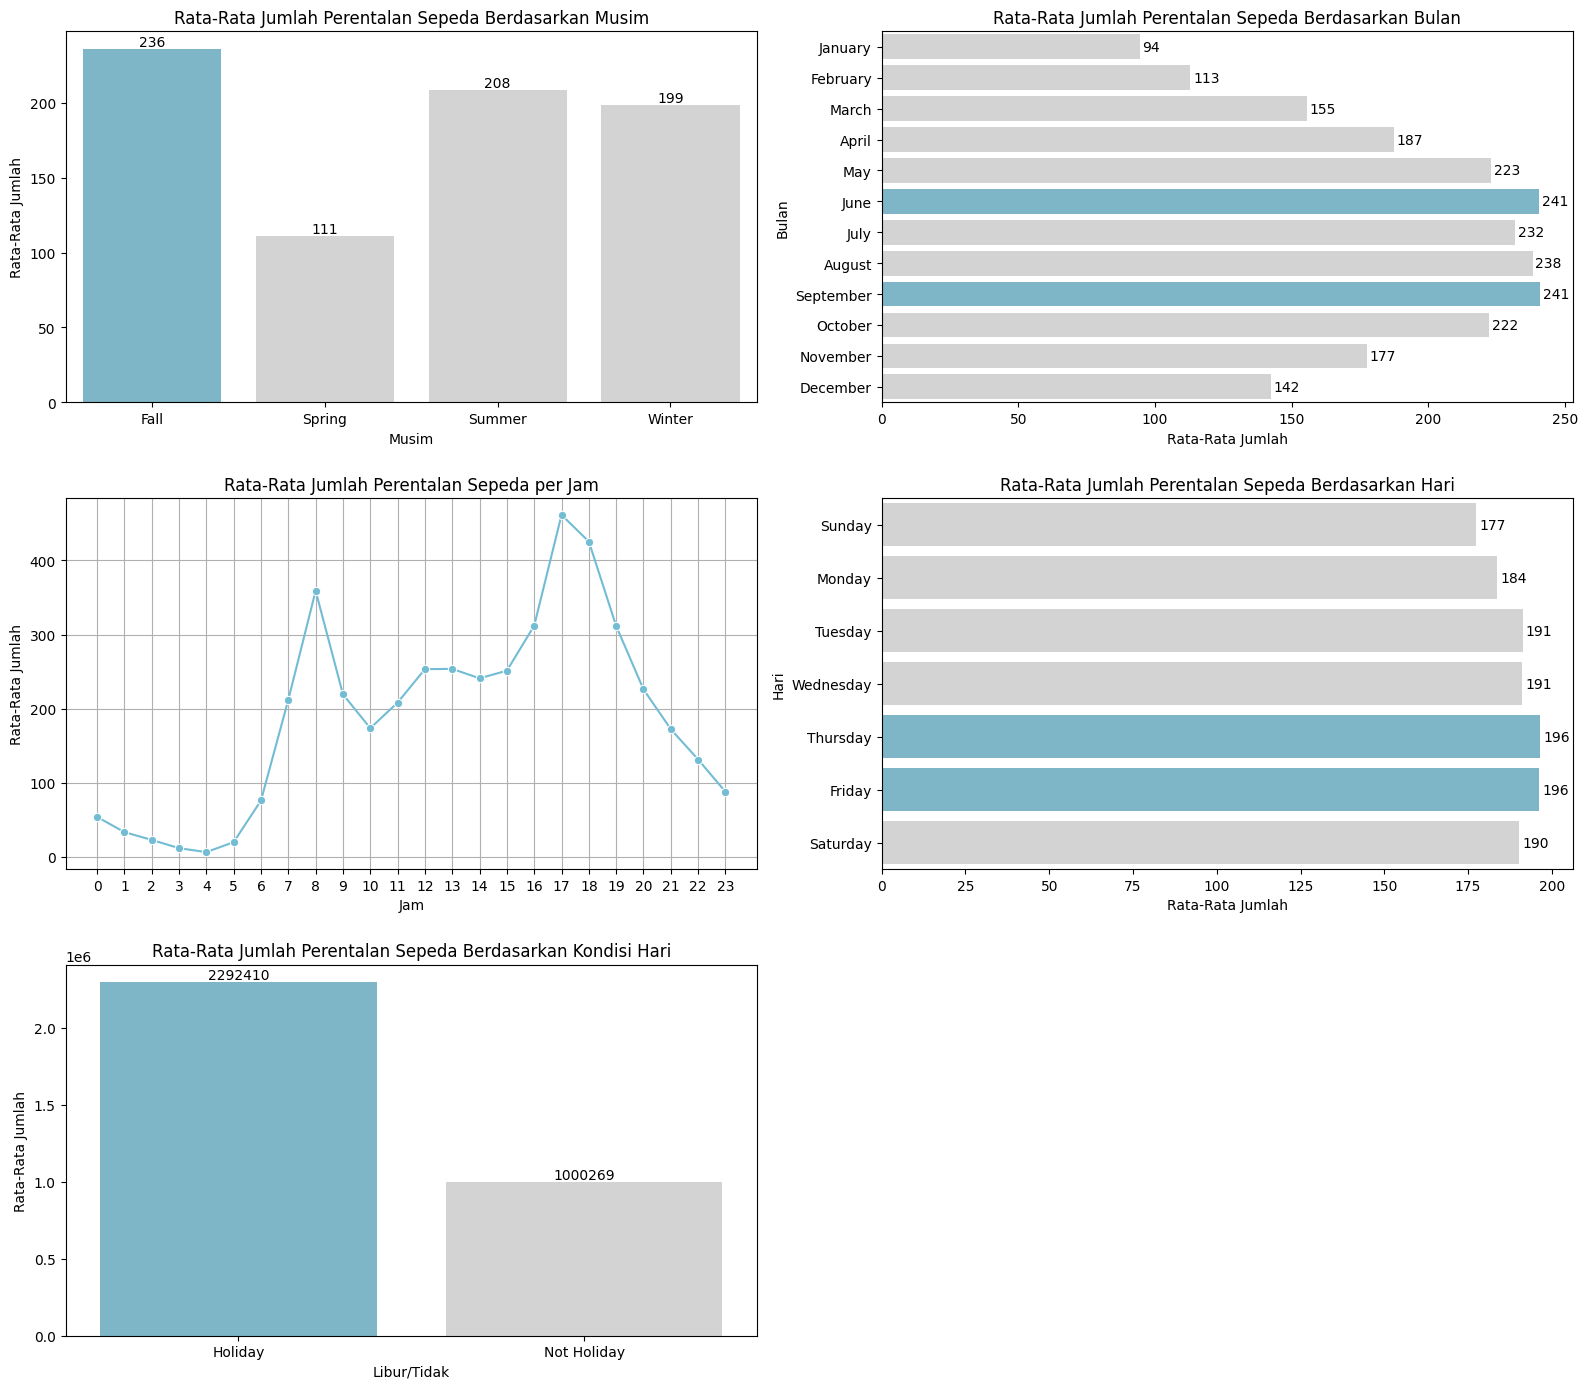

In [36]:
# Buat kanvas untuk menampilkan visualisasi yang akan ditampilkan
fig, axs = plt.subplots(3, 2, figsize=(16, 14))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Rata-Rata Jumlah Perentalan Sepeda Berdasarkan Musim
mean_cnt_per_season = hour_df.groupby('season')['cnt'].mean().reset_index()
max_value = mean_cnt_per_season['cnt'].max()
colors = ['#72BCD4' if val == max_value else '#D3D3D3' for val in mean_cnt_per_season['cnt']]
sns.barplot(data=mean_cnt_per_season, x='season', y='cnt', palette=colors, hue='season', legend=False, ax=axs[0, 0])
for index, row in mean_cnt_per_season.iterrows():
    axs[0, 0].text(index, row['cnt'], round(row['cnt']), color='black', ha="center", va="bottom")
axs[0, 0].set_title('Rata-Rata Jumlah Perentalan Sepeda Berdasarkan Musim')
axs[0, 0].set_xlabel('Musim')
axs[0, 0].set_ylabel('Rata-Rata Jumlah')

# 2. Rata-Rata Jumlah Perentalan Sepeda Berdasarkan Bulan
mean_cnt_per_month = hour_df.groupby('mnth', observed=True)['cnt'].mean().reset_index()
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
mean_cnt_per_month['mnth'] = pd.Categorical(mean_cnt_per_month['mnth'], categories=month_order, ordered=True)
mean_cnt_per_month = mean_cnt_per_month.sort_values('mnth')
colors = ["#D3D3D3"]*5 + ["#72BCD4"] + ["#D3D3D3"]*2 + ["#72BCD4"] + ["#D3D3D3"]*3
sns.barplot(data=mean_cnt_per_month, y='mnth', x='cnt', palette=colors, hue='mnth', ax=axs[0, 1])
for i, row in mean_cnt_per_month.iterrows():
    axs[0, 1].text(row['cnt'] + 1, row['mnth'], round(row['cnt']), va='center', color='black')
axs[0, 1].set_title('Rata-Rata Jumlah Perentalan Sepeda Berdasarkan Bulan')
axs[0, 1].set_xlabel('Rata-Rata Jumlah')
axs[0, 1].set_ylabel('Bulan')

# 3. Rata-Rata Jumlah Perentalan Sepeda per Jam
mean_cnt_per_hour = hour_df.groupby('hr')['cnt'].mean().reset_index()
sns.lineplot(data=mean_cnt_per_hour, x='hr', y='cnt', marker='o', color='#72BCD4', ax=axs[1, 0])
axs[1, 0].set_title('Rata-Rata Jumlah Perentalan Sepeda per Jam')
axs[1, 0].set_xlabel('Jam')
axs[1, 0].set_ylabel('Rata-Rata Jumlah')
axs[1, 0].set_xticks(range(0, 24))
axs[1, 0].grid(True)

# 4. Rata-Rata Jumlah Perentalan Sepeda Berdasarkan Hari
mean_cnt_per_weekday = hour_df.groupby('weekday', observed=True)['cnt'].mean().reset_index()
weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
mean_cnt_per_weekday['weekday'] = pd.Categorical(mean_cnt_per_weekday['weekday'], categories=weekday_order, ordered=True)
mean_cnt_per_weekday = mean_cnt_per_weekday.sort_values('weekday')
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#72BCD4", "#D3D3D3"]
sns.barplot(data=mean_cnt_per_weekday, y='weekday', x='cnt', palette=colors, hue='weekday', ax=axs[1, 1])
for i, row in mean_cnt_per_weekday.iterrows():
    axs[1, 1].text(row['cnt'] + 1, row['weekday'], round(row['cnt']), va='center', color='black')
axs[1, 1].set_title('Rata-Rata Jumlah Perentalan Sepeda Berdasarkan Hari')
axs[1, 1].set_xlabel('Rata-Rata Jumlah')
axs[1, 1].set_ylabel('Hari')

# 5. Rata-Rata Jumlah Perentalan Sepeda Berdasarkan Kondisi Hari
max_cnt_per_workingday = hour_df.groupby('workingday')['cnt'].sum().reset_index()
max_value = max_cnt_per_workingday['cnt'].sum()
colors = ["#72BCD4", "#D3D3D3"]
sns.barplot(data=max_cnt_per_workingday, x='workingday', y='cnt', palette=colors, hue='workingday', legend=False, ax=axs[2, 0])
for index, row in max_cnt_per_workingday.iterrows():
    axs[2, 0].text(index, row['cnt'], round(row['cnt']), color='black', ha="center", va="bottom")
axs[2, 0].set_title('Rata-Rata Jumlah Perentalan Sepeda Berdasarkan Kondisi Hari')
axs[2, 0].set_xlabel('Libur/Tidak')
axs[2, 0].set_ylabel('Rata-Rata Jumlah')

# Kosongkan subplot terakhir
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

### Pertanyaan 2:

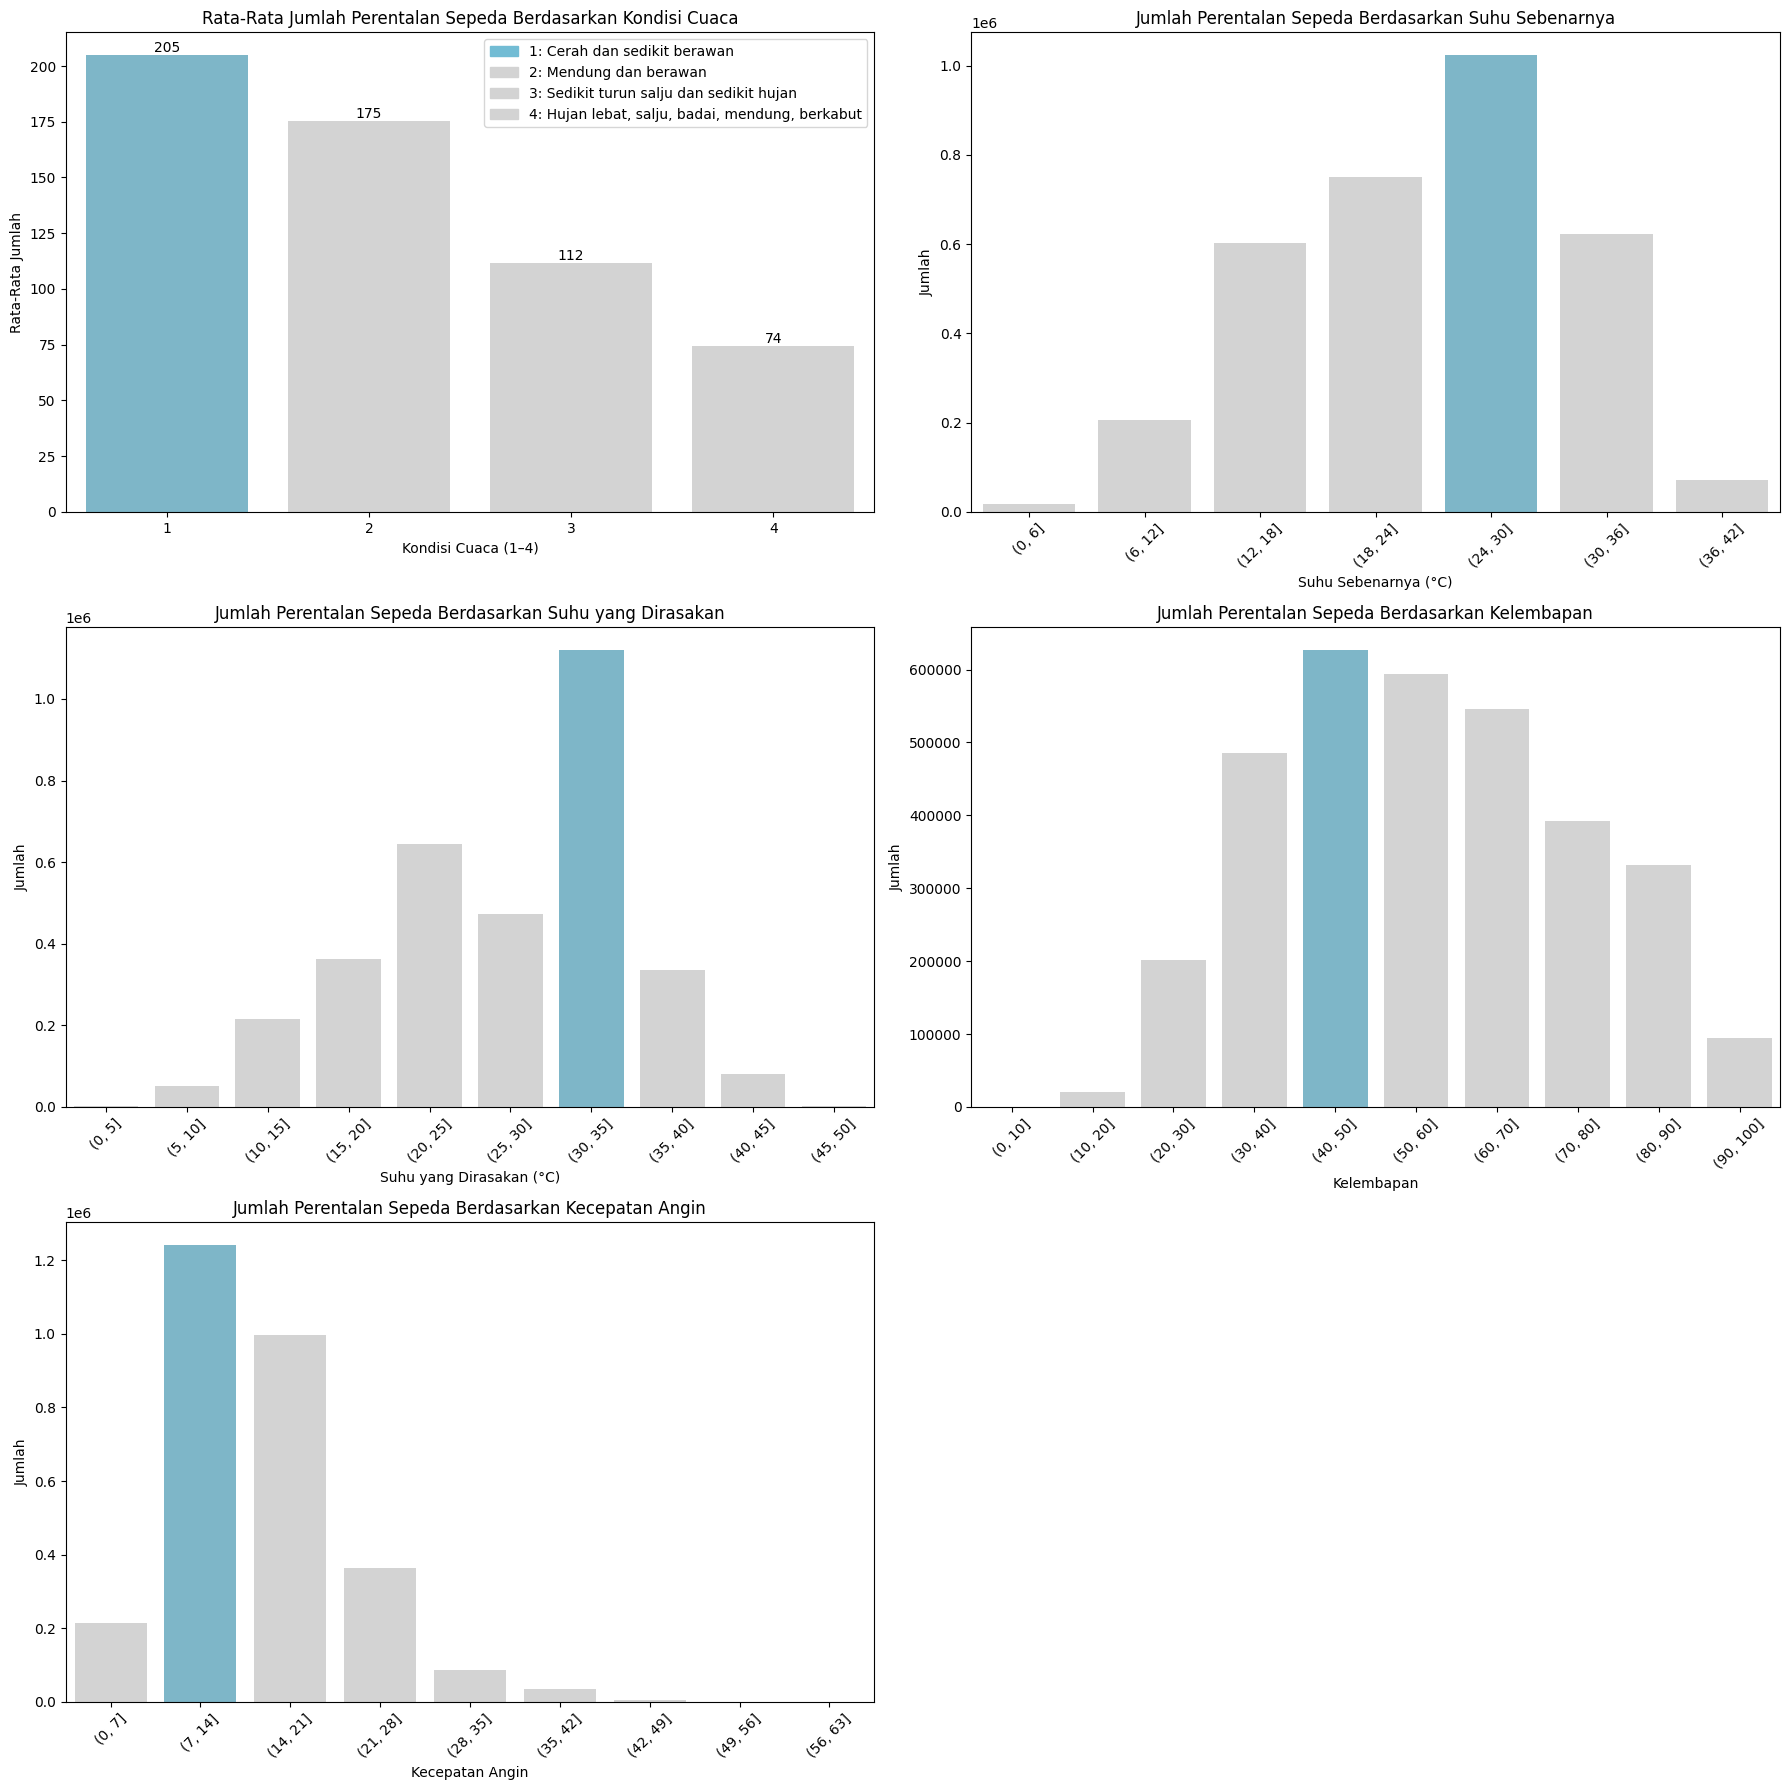

In [127]:
fig, axs = plt.subplots(3, 2, figsize=(18, 18))
axs = axs.flatten()  # agar lebih mudah diakses dengan indeks 0–4

# 1. Rata-rata per weathersit
mean_cnt_per_weathersit = hour_df.groupby('weathersit')['cnt'].mean().reset_index()
max_value = mean_cnt_per_weathersit['cnt'].max()
colors = ['#72BCD4' if val == max_value else '#D3D3D3' for val in mean_cnt_per_weathersit['cnt']]

sns.barplot(data=mean_cnt_per_weathersit, x='weathersit', y='cnt', palette=colors, hue='weathersit', dodge=False, legend=False, ax=axs[0])
for index, row in mean_cnt_per_weathersit.iterrows():
    axs[0].text(index, row['cnt'], round(row['cnt']), color='black', ha="center", va="bottom")
axs[0].set_title('Rata-Rata Jumlah Perentalan Sepeda Berdasarkan Kondisi Cuaca')
axs[0].set_xlabel('Kondisi Cuaca (1–4)')
axs[0].set_ylabel('Rata-Rata Jumlah')
legend_labels = [
    "1: Cerah dan sedikit berawan",
    "2: Mendung dan berawan",
    "3: Sedikit turun salju dan sedikit hujan",
    "4: Hujan lebat, salju, badai, mendung, berkabut"
]
legend_handles = [Patch(color="#D3D3D3", label=label) for label in legend_labels]
max_index = mean_cnt_per_weathersit['cnt'].idxmax()
legend_handles[mean_cnt_per_weathersit.loc[max_index, 'weathersit'] - 1] = Patch(
    color="#72BCD4", label=legend_labels[mean_cnt_per_weathersit.loc[max_index, 'weathersit'] - 1]
)
axs[0].legend(handles=legend_handles, loc='upper right')

# 2. Berdasarkan suhu sebenarnya
hour_df['temp_bin'] = pd.cut(hour_df['temp_actual'], bins=np.arange(0, 43, 6))
temp = hour_df.groupby('temp_bin', observed=True)['cnt'].sum().reset_index()
max_val = temp['cnt'].max()
colors = ['#72BCD4' if val == max_val else '#D3D3D3' for val in temp['cnt']]
sns.barplot(data=temp, x='temp_bin', y='cnt', hue='temp_bin', palette=colors, legend=False, ax=axs[1])
axs[1].set_title('Jumlah Perentalan Sepeda Berdasarkan Suhu Sebenarnya')
axs[1].set_xlabel('Suhu Sebenarnya (°C)')
axs[1].set_ylabel('Jumlah')
plt.setp(axs[1].get_xticklabels(), rotation=45)

# 3. Berdasarkan suhu yang dirasakan
hour_df['atemp_bin'] = pd.cut(hour_df['atemp_actual'], bins=np.arange(0, 51, 5))
atemp = hour_df.groupby('atemp_bin', observed=True)['cnt'].sum().reset_index()
max_val = atemp['cnt'].max()
colors = ['#72BCD4' if val == max_val else '#D3D3D3' for val in atemp['cnt']]
sns.barplot(data=atemp, x='atemp_bin', y='cnt', hue='atemp_bin', palette=colors, legend=False, ax=axs[2])
axs[2].set_title('Jumlah Perentalan Sepeda Berdasarkan Suhu yang Dirasakan')
axs[2].set_xlabel('Suhu yang Dirasakan (°C)')
axs[2].set_ylabel('Jumlah')
plt.setp(axs[2].get_xticklabels(), rotation=45)

# 4. Berdasarkan kelembapan
hour_df['hum_bin'] = pd.cut(hour_df['hum_actual'], bins=np.arange(0, 101, 10))
hum = hour_df.groupby('hum_bin', observed=True)['cnt'].sum().reset_index()
max_val = hum['cnt'].max()
colors = ['#72BCD4' if val == max_val else '#D3D3D3' for val in hum['cnt']]
sns.barplot(data=hum, x='hum_bin', y='cnt', hue='hum_bin', palette=colors, legend=False, ax=axs[3])
axs[3].set_title('Jumlah Perentalan Sepeda Berdasarkan Kelembapan')
axs[3].set_xlabel('Kelembapan')
axs[3].set_ylabel('Jumlah')
plt.setp(axs[3].get_xticklabels(), rotation=45)

# 5. Berdasarkan kecepatan angin
hour_df['windspeed_bin'] = pd.cut(hour_df['windspeed_actual'], bins=np.arange(0, 67, 7))
wind = hour_df.groupby('windspeed_bin', observed=True)['cnt'].sum().reset_index()
max_val = wind['cnt'].max()
colors = ['#72BCD4' if val == max_val else '#D3D3D3' for val in wind['cnt']]
sns.barplot(data=wind, x='windspeed_bin', y='cnt', hue='windspeed_bin', palette=colors, legend=False, ax=axs[4])
axs[4].set_title('Jumlah Perentalan Sepeda Berdasarkan Kecepatan Angin')
axs[4].set_xlabel('Kecepatan Angin')
axs[4].set_ylabel('Jumlah')
plt.setp(axs[4].get_xticklabels(), rotation=45)

# Matikan sumbu subplot kosong jika hanya pakai 5 plot
axs[5].axis('off')

plt.tight_layout()
plt.show()

## Conclusion

**Pertanyaan 1: Kapan waktu paling optimal untuk menyediakan lebih banyak sepeda untuk direntalkan?**
- Waktu paling optimal untuk menyediakan lebih banyak sepeda untuk direntalkan adalah pada musim gugur (fall), pada bulan Juni atau September, jam 5 sore, hari Kamis atau Jumat, dan pada saat hari libur.

**Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda (baik kasual maupun terdaftar)?**
- Kondisi cuaca yang cerah membuat orang-orang lebih ingin merental sepeda, sedangkan jika turun hujan hingga badai, jumlah perentalan sepeda semakin sedikit.
- Untuk kondisi suhu, suhu normal (yaitu pada rentang 24-30°C) adalah suhu terbaik untuk merental sepeda. Suhu yang lebih dingin (berkisar antara 18-24°C) juga lebih menarik minat orang untuk merental sepeda dibanding suhu yang lebih panas (berkisar antara 30-36°C)
- Kelembapan yang paling menarik minat orang-orang untuk merental sepeda ada pada angka 40-50.
- Kecepatan angin yang paling menarik minat orang-orang untuk meerntal sepeda ada pada angka 7-14. Hal ini agak kontra pada proses EDA yang menyatakan maksimal jumlah perentalan sepeda terbanyak ada pada kecepatan angin 0, kemungkinan penyebabnya adalah kesalahan input data.